<a href="https://colab.research.google.com/github/essexgroup31/scrappy-doo/blob/main/Copy_of_Covid19_Twitter_SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# Install Tweepy
#!pip install tweepy
# Install Matplotlib
#!pip install matplotlib


In [30]:
def removeSuffix(item,suffix):
  if item.endswith(suffix):
    return item[:-len(suffix)]
  else:
    return item[:]

In [37]:
import string
def punctuationRemover(sentence):
    myList = []
    for each in range(len(sentence)-1):
        if sentence[each] in string.punctuation:
            if sentence[each+1] in string.ascii_letters:
                myList.append(x[each])
                myList.append(" ")
            else:
                myList.append(x[each])
        else:
            myList.append(x[each])   # <------------------ HERE IS THE ERROR
                
    
    for each in range(len(myList)):
        if myList[each] in string.punctuation:
            myList[each] = "/"

    sentence = ""

    for each in myList:
        if each != "/":
          sentence = sentence + str(each)

    return sentence

In [31]:
def stripShire(sentence):
    sentence = sentence.split()
    completedsentence = []
    
    for each in sentence:
        completedsentence.append(removeSuffix(each, "shire"))
    

    return completedsentence

In [13]:
import re
import tweepy
from tweepy import OAuthHandler
consumer_api_key = 'uQP9N32xpuEIujXsDV2VgcekC'
consumer_api_secret = 'aLWDUV2P718ZoOicHCgpvQ8JUWgaOVcce14iA5oXGdtb0PsEV8' 
access_token = '1315962347836579840-WKXz7fp8UEZAaOtABYv1fIpoZpXX7q'
access_token_secret ='mitdeExvQ0SFuPGn3HsUhG0faElwQQPSE7FmhaZBNvh76'
print (consumer_api_key)
print (access_token)

uQP9N32xpuEIujXsDV2VgcekC
1315962347836579840-WKXz7fp8UEZAaOtABYv1fIpoZpXX7q


In [14]:
authorizer = OAuthHandler(consumer_api_key, consumer_api_secret)
authorizer.set_access_token(access_token, access_token_secret)

In [15]:
#search_query = input("Hello user, what would you like to search?\nSearch: ")

In [16]:
api = tweepy.API(authorizer ,timeout=15, wait_on_rate_limit=True)
all_tweets = []
ukTweetList = []
search_query = 'covid19'

for tweet_object in tweepy.Cursor(api.search,q=search_query+" -filter:retweets",lang='en',result_type='recent').items(2000):
    all_tweets.append(tweet_object.text)
    #print(tweet_object.user.location)
    if ("UK" or "United Kingdom") in tweet_object.user.location:
      ukTweetList.append(tweet_object)
    

In [38]:
ukCounties = ["Bedford","Berk","Bristol","Buckingham","Cambridge","Ches","Cornwall","Cumbria","Derby","Devon","Dorset","Durham","Sussex","Essex","Gloucester","City of London", "Manchester", "Hamp","Hereford","Hertford","Isle of Wight", "Kent", "Lanca", "Leicester","Lincoln","London", "Merseyside", "Norfolk", "Northampton", "Northumberland", "North York", "Nottingham", "Oxford", "Rutland", "Shrop", "Somerset","South York", "Stafford", "Suffold", "Surrey", "Tyne and Wear", "Warwick", "West Midlands", "West Sussex", "West York", "Wilt", "Worcester"]
tweetLocationData = []
# List of uk counties without "shire" at the end (because of the way that twitter works with locations)
for each in ukTweetList:
    tweetData = each
    location = each.user.location
    
    #time to die :D (kill me)
    location = punctuationRemover(location)
    location = stripShire(location)
    print(location)

    tweetData = "d"

    for x in location:
        if x in ukCounties:
          location = x
          if len(tweetLocationData) == 0:
            tweetLocationData.append([location,tweetData])
            
          else:
            for each in range(len(tweetLocationData)):
              if tweetLocationData[each][0] == location:
                tweetLocationData[each].append(tweetData)
                break
              else:
                tweetLocationData.append([location, tweetData])
                break
            

print(tweetLocationData)
    
    



11
10
0
London, UK 
11
10
1
London, UK 
11
10
2
London, UK 


IndexError: ignored

In [18]:
import numpy as np 
import pandas as pd 
import re  
import nltk # an amazing library to play with natural language
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [19]:
tweets = pd.read_csv("https://raw.githubusercontent.com/kolaveridi/kaggle-Twitter-US-Airline-Sentiment-/master/Tweets.csv")
print(tweets)

                 tweet_id  ...               user_timezone
0      570306133677760513  ...  Eastern Time (US & Canada)
1      570301130888122368  ...  Pacific Time (US & Canada)
2      570301083672813571  ...  Central Time (US & Canada)
3      570301031407624196  ...  Pacific Time (US & Canada)
4      570300817074462722  ...  Pacific Time (US & Canada)
...                   ...  ...                         ...
14635  569587686496825344  ...                         NaN
14636  569587371693355008  ...                         NaN
14637  569587242672398336  ...                         NaN
14638  569587188687634433  ...  Eastern Time (US & Canada)
14639  569587140490866689  ...                         NaN

[14640 rows x 15 columns]


In [20]:
X = tweets.iloc[:, 10].values
y = tweets.iloc[:, 1].values

print(X)

['@VirginAmerica What @dhepburn said.'
 "@VirginAmerica plus you've added commercials to the experience... tacky."
 "@VirginAmerica I didn't today... Must mean I need to take another trip!"
 ... '@AmericanAir Please bring American Airlines to #BlackBerry10'
 "@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??"
 '@AmericanAir we have 8 ppl so we need 2 know how many seats are on the next flight. Plz put us on standby for 4 people on the next flight?']


In [21]:
processed_tweets = []
 
for tweet in range(0, len(X)):  
    # Remove all the special characters
    processed_tweet = re.sub(r'\W', ' ', str(X[tweet]))
 
    # remove all single characters
    processed_tweet = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_tweet)
 
    # Remove single characters from the start
    processed_tweet = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_tweet) 
 
    # Substituting multiple spaces with single space
    processed_tweet= re.sub(r'\s+', ' ', processed_tweet, flags=re.I)
 
    # Removing prefixed 'b'
    processed_tweet = re.sub(r'^b\s+', '', processed_tweet)
 
    # Converting to Lowercase
    processed_tweet = processed_tweet.lower()
 
    processed_tweets.append(processed_tweet)

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer  
tfidfconverter = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))  
X = tfidfconverter.fit_transform(processed_tweets).toarray()


In [23]:
from sklearn.ensemble import RandomForestClassifier
text_classifier = RandomForestClassifier(n_estimators=100, random_state=1)  
text_classifier.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [26]:
negativeCounter = 0
neutralCounter = 0
positiveCounter = 0
for tweet in all_tweets:
    # Remove all the special characters
    processed_tweet = re.sub(r'\W', ' ', tweet)
 
    # remove all single characters
    processed_tweet = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_tweet)
 
    # Remove single characters from the start
    processed_tweet = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_tweet) 
 
    # Substituting multiple spaces with single space
    processed_tweet= re.sub(r'\s+', ' ', processed_tweet, flags=re.I)
 
    # Removing prefixed 'b'
    processed_tweet = re.sub(r'^b\s+', '', processed_tweet)
 
    # Converting to Lowercase
    processed_tweet = processed_tweet.lower()
 
    sentiment = text_classifier.predict(tfidfconverter.transform([ processed_tweet]).toarray())
    

    # We need to create something that counts the different sentiments
    # Which will then be the data for the pie chart.

    if sentiment == "positive":
      positiveCounter+=1
    elif sentiment == "negative":
      negativeCounter+=1
    elif sentiment == "neutral":
      neutralCounter+=1
   
    #print(tweet, sentiment)


    

#print(all_tweets)
print("Positive sentiments:",positiveCounter)
print("Negative sentiments:",negativeCounter)
print("Neutral sentiments:",neutralCounter)

Positive sentiments: 84
Negative sentiments: 922
Neutral sentiments: 994


[922, 994, 84]


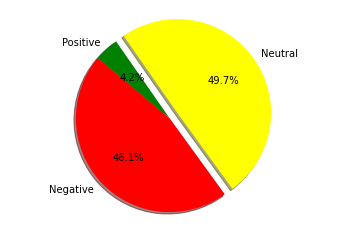

In [25]:
import matplotlib.pyplot as pyplot
labels = "Negative", "Neutral", "Positive"
sizes = [negativeCounter,neutralCounter,positiveCounter]
print(sizes)
colors = ["red","yellow","green"]

if sizes[0] > sizes[1] and sizes[0] > sizes[1]:
    explode = (0.1,0,0)
elif sizes[1] > sizes[0] and sizes[1] > sizes[2]:
    explode = (0,0.1,0)
else:
    explode = (0,0,0.1)


pyplot.pie(sizes,explode = explode, labels=labels,colors=colors,autopct="%1.1f%%", shadow=True, startangle=140)
pyplot.axis("equal")
pyplot.show()
